# Importing Required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install sklearn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from statistics import mean
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, r2_score,mean_absolute_error,confusion_matrix as cm
from scipy.stats import multivariate_normal as mvn
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Dataset

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
data.shape

(918, 12)

# Description Of Dataset


The columns in the dataset are :-

*   Age: age of the patient [years]
*Sex: sex of the patient [M: Male, F: Female]
*ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
*RestingBP: resting blood pressure [mm Hg]
*Cholesterol: serum cholesterol [mm/dl]
*FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
*RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
*MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
*ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
*Oldpeak: oldpeak = ST [Numeric value measured in depression]
*ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
*HeartDisease: output class [1: heart disease, 0: Normal]




In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB





* The Dataset contains only non-null values, so no need to process the missings values.
* Some Column type needs to change



In [9]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')
data['HeartDisease'] = data['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [11]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

# Descriptive Statistics

In [12]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [13]:
data.describe(include = ['object', 'category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


# Exploratory Data Analysis 

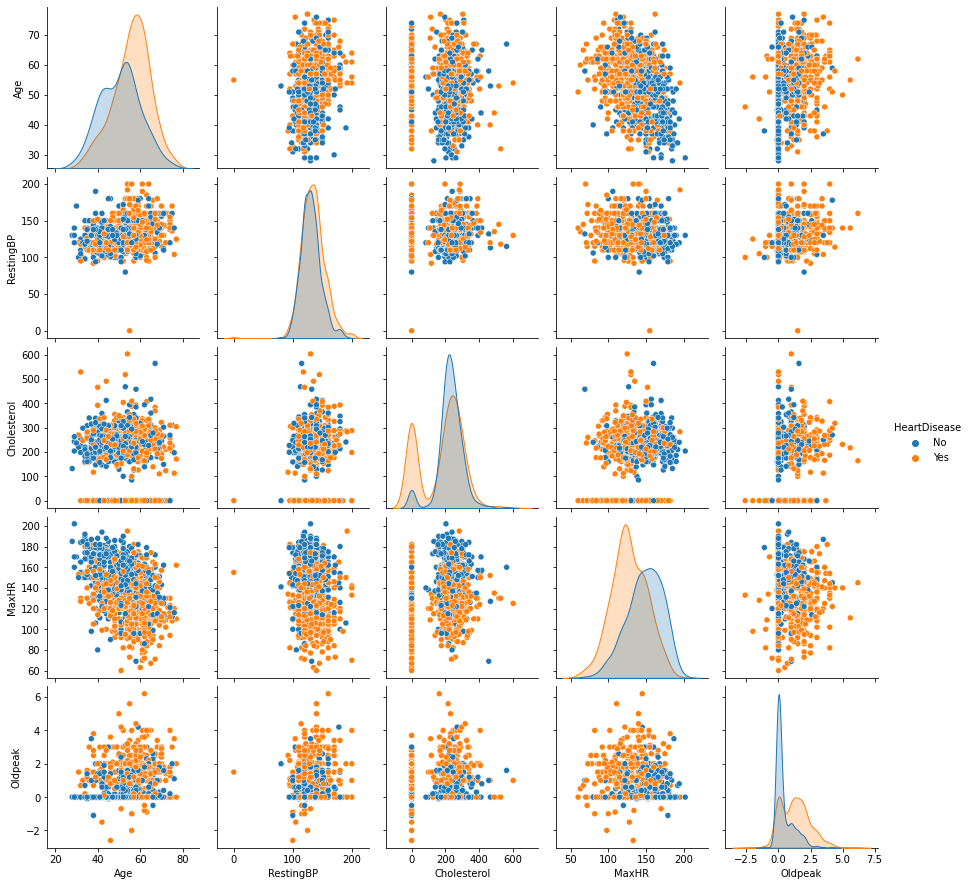

In [14]:
sns.pairplot(data,hue='HeartDisease')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

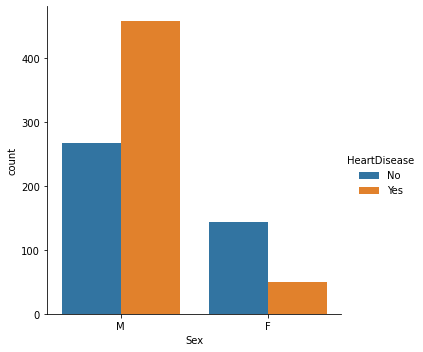

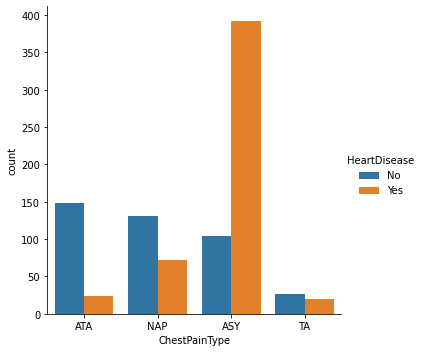

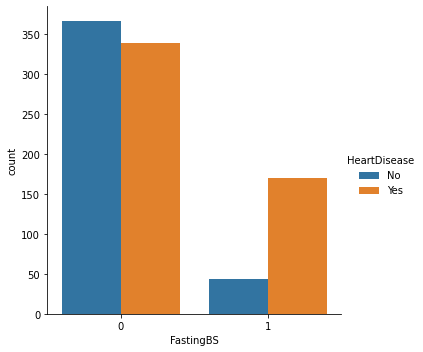

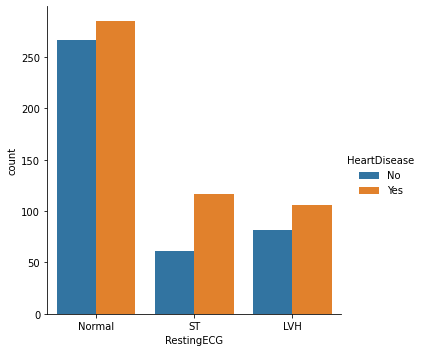

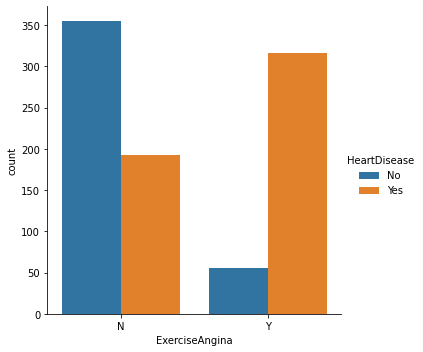

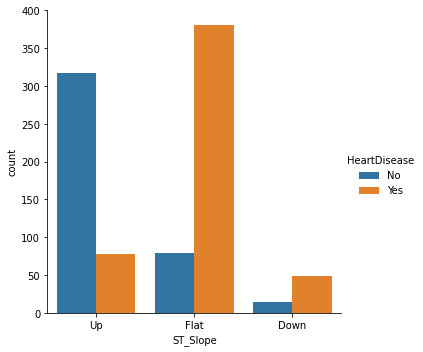

In [15]:
sns.factorplot('Sex',data=data,hue='HeartDisease',kind='count')
sns.factorplot('ChestPainType',data=data,hue='HeartDisease',kind='count')
sns.factorplot('FastingBS',data=data,hue='HeartDisease',kind='count')
sns.factorplot('RestingECG',data=data,hue='HeartDisease',kind='count')
sns.factorplot('ExerciseAngina',data=data,hue='HeartDisease',kind='count')
sns.factorplot('ST_Slope',data=data,hue='HeartDisease',kind='count')



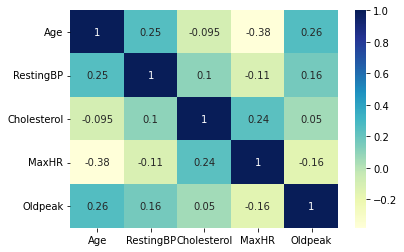

In [16]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Data Preprocessing

In [17]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,Yes
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,Yes
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,Yes
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,Yes


## Categorical Encoding

In [18]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])
data['HeartDisease'] = le.fit_transform(data['HeartDisease'])

In [19]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Normalization

In [20]:
x = data.drop(['HeartDisease'], axis='columns')
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [21]:
y = data.HeartDisease
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [22]:
scaler = StandardScaler()
scaler.fit(x)
arr = scaler.transform(x)
arr

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [23]:
xdf = pd.DataFrame(arr, columns=['Age',	'Sex',	'ChestPainType',	'RestingBP',	'Cholesterol',	'FastingBS',	'RestingECG',	'MaxHR',	'ExerciseAngina',	'Oldpeak',	'ST_Slope'])
xdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


# Correlation Heatmap

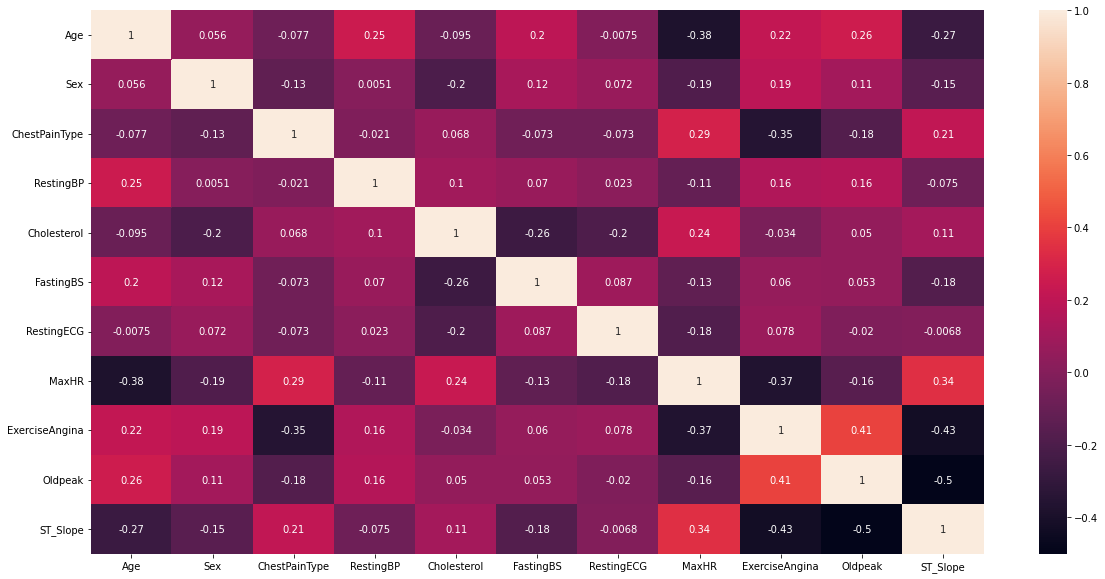

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(xdf.corr(), annot = True)
plt.show()

## Splitting

In [25]:
x_train, x_test, y_train, y_test = train_test_split(xdf, y, test_size=0.2)

# Models

In [26]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

## XGBoost

In [27]:
import xgboost as xgb

In [28]:
m_xgc=xgb.XGBClassifier()
m_xgc.fit(x_train,y_train)
p_xgc=m_xgc.predict(x_test)


In [29]:
ac_xgc=accuracy_score(y_test,p_xgc)
f1_xgc=	f1_score(y_test,p_xgc)
r_xgc= recall_score(y_test,p_xgc)
pc_xgc=precision_score(y_test,p_xgc)
rocauc_xgc=roc_auc_score(y_test,p_xgc)
cm_xgc=confusion_matrix(y_test,p_xgc)
print('the accuracy is',ac_xgc)
print('the f1_score is',f1_xgc)
print('the recall score is',r_xgc)
print('the precision score is',pc_xgc)
print('the roc auc score is',rocauc_xgc)
print('the confusion matrix is',cm_xgc)
print('the classification report is',classification_report(y_test,p_xgc))

the accuracy is 0.8532608695652174
the f1_score is 0.8695652173913043
the recall score is 0.8490566037735849
the precision score is 0.8910891089108911
the roc auc score is 0.854015481373972
the confusion matrix is [[67 11]
 [16 90]]
the classification report is               precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.89      0.85      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



### GridSearchCV

In [30]:
param={'n_estimators':[100,500,1000],'max_depth':[3,4,5,10],'min_child_weight':[6,8,10,12]}

In [31]:
searchxg=GridSearchCV(estimator=xgb.XGBClassifier(),param_grid=param,scoring='accuracy',n_jobs=1,cv=5)
searchxg.fit(x_train,y_train)
searchxg.best_params_

{'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}

In [32]:
m_xgcah=xgb.XGBClassifier(max_depth=3, min_child_weight=6, n_estimators=100)
m_xgcah.fit(x_train,y_train)
p_xgcah= m_xgcah.predict(x_test)

In [33]:
ac_xgcah=accuracy_score(y_test,p_xgcah)
f1_xgcah=	f1_score(y_test,p_xgcah)
r_xgcah= recall_score(y_test,p_xgcah)
pc_xgcah=precision_score(y_test,p_xgcah)
rocauc_xgcah=roc_auc_score(y_test,p_xgcah)
cm_xgcah=confusion_matrix(y_test,p_xgcah)
print('the accuracy is',ac_xgcah)
print('the f1_score is',f1_xgcah)
print('the recall score is',r_xgcah)
print('the precision score is',pc_xgcah)
print('the roc auc score is',rocauc_xgcah)
print('the confusion matrix is',cm_xgcah)
print('the classification report is',classification_report(y_test,p_xgcah))

the accuracy is 0.8478260869565217
the f1_score is 0.8640776699029127
the recall score is 0.839622641509434
the precision score is 0.89
the roc auc score is 0.8492985002418965
the confusion matrix is [[67 11]
 [17 89]]
the classification report is               precision    recall  f1-score   support

           0       0.80      0.86      0.83        78
           1       0.89      0.84      0.86       106

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Feature Selection

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

[0.07269161 0.056501   0.08911341 0.06942674 0.09267536 0.04807957
 0.03868253 0.08077878 0.14336226 0.09268529 0.21600346]


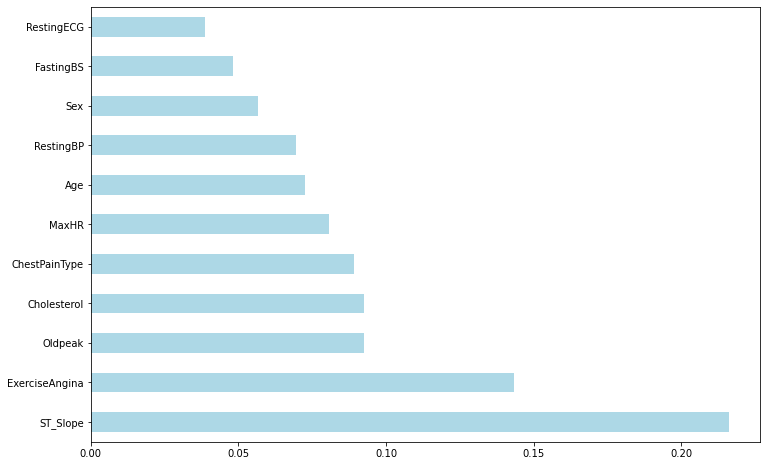

In [35]:
selection = ExtraTreesClassifier()
selection.fit(x, y)
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh' , color ='lightblue')
plt.show()

### SFS

In [36]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
X_train_n=x_train.to_numpy()
Y_train_n=y_train.to_numpy()

In [38]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
417,-1.008848,0.515952,-0.816995,-0.129513,0.093304,-0.551341,1.601219,-0.385490,-0.823556,-0.832432,1.052114
619,2.173339,-1.938163,0.229032,-0.669935,0.642129,-0.551341,-1.566710,-0.621280,1.214246,-0.644813,1.052114
626,-0.054192,0.515952,-0.816995,0.518993,0.248804,-0.551341,-1.566710,-1.014262,1.214246,-0.832432,1.052114
640,-0.584556,-1.938163,1.275059,-0.129513,0.697011,-0.551341,0.017255,0.086088,-0.823556,-0.644813,1.052114
442,-0.266338,0.515952,-0.816995,-0.237597,-1.818435,1.813758,1.601219,-0.464087,1.214246,0.293283,-0.596078
...,...,...,...,...,...,...,...,...,...,...,...
37,-1.327067,-1.938163,0.229032,-1.210356,0.468334,-0.551341,1.601219,0.203982,-0.823556,-0.832432,1.052114
389,0.794391,0.515952,-0.816995,1.491752,-1.818435,1.813758,1.601219,0.321877,-0.823556,0.105664,-0.596078
522,-0.372411,0.515952,-0.816995,0.627078,1.373895,-0.551341,-1.566710,-0.660578,1.214246,0.105664,1.052114
278,0.370100,-1.938163,-0.816995,2.572596,1.355601,-0.551341,1.601219,-0.424789,1.214246,-0.081956,-0.596078


In [39]:
reg_xg= xgb.XGBClassifier(max_depth=3, min_child_weight=6, n_estimators=100)
reg_xg.fit(X_train_n, Y_train_n)

XGBClassifier(min_child_weight=6)

In [40]:
sbs=SFS(estimator= reg_xg,k_features=11, scoring='accuracy',forward=True,floating=False,cv=5)

In [41]:
sbs.fit(X_train_n,Y_train_n)

SequentialFeatureSelector(estimator=XGBClassifier(min_child_weight=6),
                          k_features=11, scoring='accuracy')

In [42]:
sbs.k_score_

0.8610287950796757

In [43]:
sbsdf=pd.DataFrame.from_dict(sbs.get_metric_dict()).T
sbsdf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8027210884353742, 0.8639455782312925, 0.829...",0.813335,"(10,)",0.040986,0.031888,0.015944
2,"(4, 10)","[0.8367346938775511, 0.8571428571428571, 0.843...",0.831069,"(4, 10)",0.032845,0.025555,0.012777
3,"(1, 4, 10)","[0.8571428571428571, 0.8299319727891157, 0.857...",0.836539,"(1, 4, 10)",0.037332,0.029046,0.014523
4,"(1, 4, 5, 10)","[0.8639455782312925, 0.8299319727891157, 0.857...",0.841981,"(1, 4, 5, 10)",0.029309,0.022804,0.011402
5,"(1, 4, 5, 8, 10)","[0.8435374149659864, 0.8639455782312925, 0.863...",0.843304,"(1, 4, 5, 8, 10)",0.024328,0.018928,0.009464
6,"(1, 4, 5, 8, 9, 10)","[0.8707482993197279, 0.8707482993197279, 0.863...",0.856947,"(1, 4, 5, 8, 9, 10)",0.022806,0.017744,0.008872
7,"(1, 2, 4, 5, 8, 9, 10)","[0.8639455782312925, 0.8843537414965986, 0.877...",0.865129,"(1, 2, 4, 5, 8, 9, 10)",0.024295,0.018903,0.009451
8,"(1, 2, 3, 4, 5, 8, 9, 10)","[0.891156462585034, 0.8843537414965986, 0.8911...",0.877355,"(1, 2, 3, 4, 5, 8, 9, 10)",0.018704,0.014552,0.007276
9,"(1, 2, 3, 4, 5, 6, 8, 9, 10)","[0.8843537414965986, 0.891156462585034, 0.8979...",0.880095,"(1, 2, 3, 4, 5, 6, 8, 9, 10)",0.018987,0.014772,0.007386
10,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10)","[0.8571428571428571, 0.8707482993197279, 0.891...",0.867832,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10)",0.01644,0.012791,0.006395


In [44]:
sbs.k_feature_names_

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')

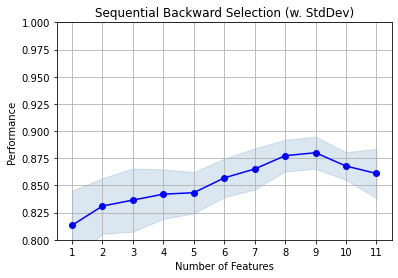

In [45]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(xdf, y, test_size=0.2)

In [47]:
X_train=X_train.drop(['RestingECG'],axis='columns')
X_test=X_test.drop(['RestingECG'],axis='columns')
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
505,0.157954,0.515952,1.275059,0.194740,0.422599,1.813758,-0.228298,1.214246,0.293283,-0.596078
79,-0.478484,0.515952,-0.816995,-0.129513,0.065863,-0.551341,1.304332,-0.823556,-0.832432,-0.596078
839,-1.963504,-1.938163,-0.816995,0.302825,-0.144520,-0.551341,1.775910,-0.823556,0.480902,1.052114
800,-1.114921,0.515952,1.275059,-0.129513,1.062894,-0.551341,0.989946,-0.823556,0.949950,1.052114
508,1.430829,0.515952,-0.816995,-0.669935,-1.818435,1.813758,0.518368,-0.823556,0.574711,-2.244270
...,...,...,...,...,...,...,...,...,...,...
829,-2.599942,0.515952,0.229032,-0.129513,0.047569,-0.551341,2.561874,-0.823556,-0.832432,1.052114
331,0.264027,0.515952,-0.816995,-0.940145,-1.818435,1.813758,-2.153909,-0.823556,-1.770528,1.052114
846,-1.539213,0.515952,-0.816995,-0.778019,0.184775,-0.551341,0.125386,-0.823556,0.293283,-0.596078
138,0.051881,0.515952,-0.816995,0.410909,-0.300020,-0.551341,-0.739174,1.214246,-0.832432,-0.596078


In [48]:
m_xgcahf= xgb.XGBClassifier(max_depth=3, min_child_weight=6, n_estimators=100)
m_xgcahf.fit(X_train, Y_train)
p_xgcahf=m_xgcahf.predict(X_test)

In [49]:
ac_xgcahf=accuracy_score(Y_test,p_xgcahf)
f1_xgcahf=	f1_score(Y_test,p_xgcahf)
r_xgcahf= recall_score(Y_test,p_xgcahf)
pc_xgcahf=precision_score(Y_test,p_xgcahf)
rocauc_xgcahf=roc_auc_score(Y_test,p_xgcahf)
cm_xgcahf=confusion_matrix(Y_test,p_xgcahf)
print('the accuracy is',ac_xgcahf)
print('the f1_score is',f1_xgcahf)
print('the recall score is',r_xgcahf)
print('the precision score is',pc_xgcahf)
print('the roc auc score is',rocauc_xgcahf)
print('the confusion matrix is',cm_xgcahf)
print('the classification report is',classification_report(Y_test,p_xgcahf))

the accuracy is 0.8967391304347826
the f1_score is 0.9090909090909091
the recall score is 0.9134615384615384
the precision score is 0.9047619047619048
the roc auc score is 0.8942307692307692
the confusion matrix is [[70 10]
 [ 9 95]]
the classification report is               precision    recall  f1-score   support

           0       0.89      0.88      0.88        80
           1       0.90      0.91      0.91       104

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



### Comparison

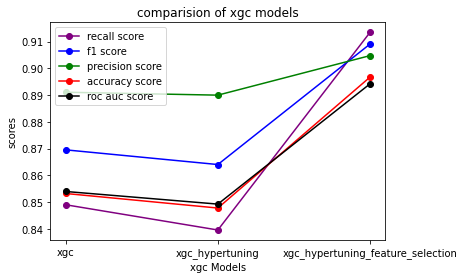

In [50]:
x_xgc=['xgc','xgc_hypertuning','xgc_hypertuning_feature_selection']
y_r_xgc=[r_xgc,r_xgcah,r_xgcahf]
y_f1_xgc=[f1_xgc,f1_xgcah,f1_xgcahf]
y_pc_xgc=[pc_xgc,pc_xgcah,pc_xgcahf]
y_ac_xgc=[ac_xgc,ac_xgcah,ac_xgcahf]
y_rocauc_xgc = [rocauc_xgc,rocauc_xgcah,rocauc_xgcahf]
plt.plot(x_xgc, y_r_xgc, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x_xgc, y_f1_xgc, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x_xgc, y_pc_xgc, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x_xgc, y_ac_xgc, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x_xgc, y_rocauc_xgc, color = 'black', marker = 'o', label = 'roc auc score')    
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("xgc Models")
plt.ylabel("scores")
plt.title("comparision of xgc models")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

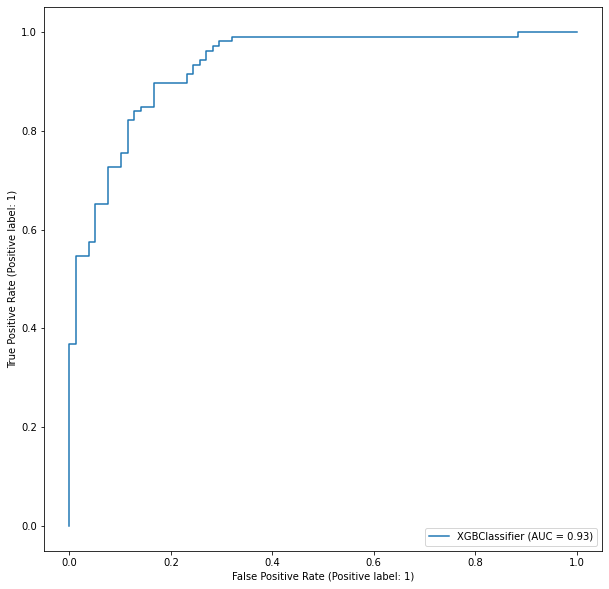

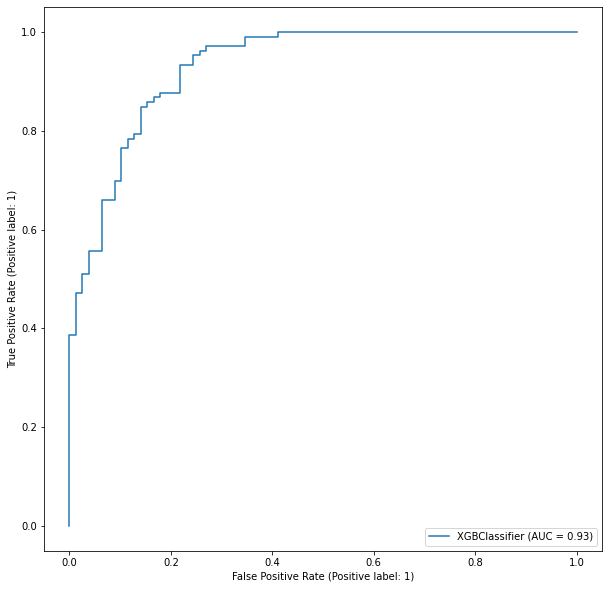

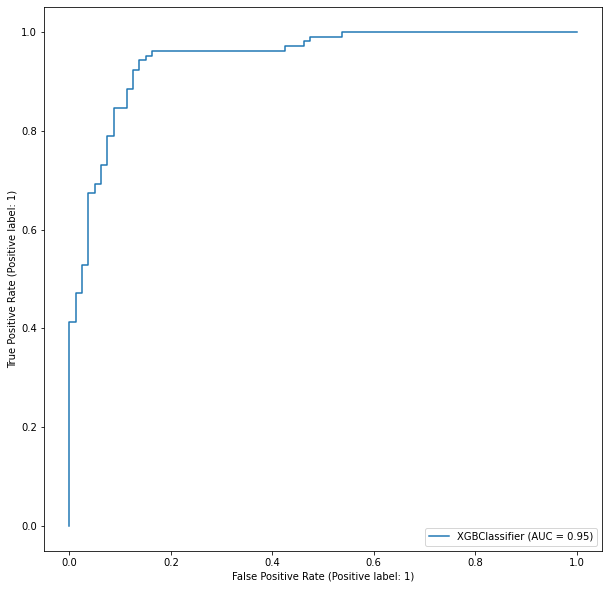

In [51]:
plot_roc_curve(m_xgc, x_test, y_test) 
plot_roc_curve(m_xgcah, x_test, y_test) 
plot_roc_curve(m_xgcahf, X_test, Y_test) 
plt.show()

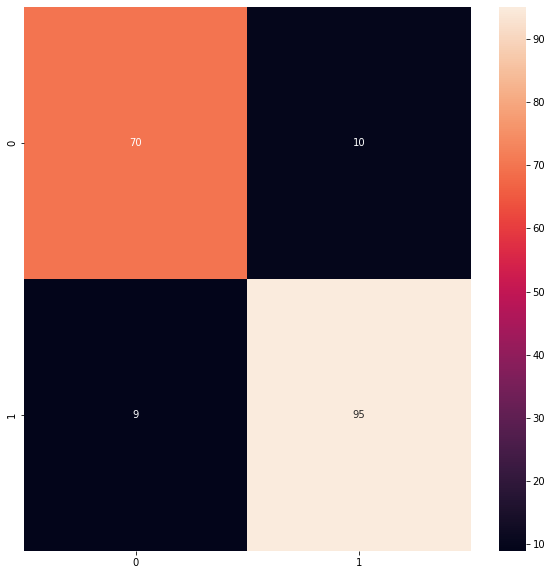

In [52]:
sns.heatmap(cm_xgcahf, annot=True)

## SVC

In [53]:
m_svc=SVC()
m_svc.fit(x_train,y_train)
p_svc=m_svc.predict(x_test)

In [54]:
ac_svc=accuracy_score(y_test,p_svc)
f1_svc=	f1_score(y_test,p_svc)
r_svc= recall_score(y_test,p_svc)
pc_svc=precision_score(y_test,p_svc)
rocauc_svc=roc_auc_score(y_test,p_svc)
cm_svc=confusion_matrix(y_test,p_svc)
print('the accuracy is',ac_svc)
print('the f1_score is',f1_svc)
print('the recall score is',r_svc)
print('the precision score is',pc_svc)
print('the roc auc score is',rocauc_svc)
print('the confusion matrix is',cm_svc)
print('the classification report is',classification_report(y_test,p_svc))

the accuracy is 0.8695652173913043
the f1_score is 0.8857142857142858
the recall score is 0.8773584905660378
the precision score is 0.8942307692307693
the roc auc score is 0.8681664247701983
the confusion matrix is [[67 11]
 [13 93]]
the classification report is               precision    recall  f1-score   support

           0       0.84      0.86      0.85        78
           1       0.89      0.88      0.89       106

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### GRidSearchCV

In [55]:
param_gridsvc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']}

In [56]:
searchsvc=GridSearchCV(estimator=SVC(),param_grid=param_gridsvc,scoring='accuracy',n_jobs=1,cv=5)
searchsvc.fit(x_train,y_train)
searchsvc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [57]:
m_svcah=SVC(C=1, gamma=0.1,kernel='rbf')
m_svcah.fit(x_train,y_train)
p_svcah= m_svcah.predict(x_test)

In [58]:
ac_svcah=accuracy_score(y_test,p_svcah)
f1_svcah=	f1_score(y_test,p_svcah)
r_svcah= recall_score(y_test,p_svcah)
pc_svcah=precision_score(y_test,p_svcah)
rocauc_svcah=roc_auc_score(y_test,p_svcah)
cm_svcah=confusion_matrix(y_test,p_svcah)
print('the accuracy is',ac_svcah)
print('the f1_score is',f1_svcah)
print('the recall score is',r_svcah)
print('the precision score is',pc_svcah)
print('the roc auc score is',rocauc_svcah)
print('the confusion matrix is',cm_svcah)
print('the classification report is',classification_report(y_test,p_svcah))

the accuracy is 0.8695652173913043
the f1_score is 0.8857142857142858
the recall score is 0.8773584905660378
the precision score is 0.8942307692307693
the roc auc score is 0.8681664247701983
the confusion matrix is [[67 11]
 [13 93]]
the classification report is               precision    recall  f1-score   support

           0       0.84      0.86      0.85        78
           1       0.89      0.88      0.89       106

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### SFS

In [59]:
m_svcahf=SVC(C=1, gamma=0.1,kernel='rbf')
m_svcahf.fit(X_train,Y_train)
p_svcahf= m_svcahf.predict(X_test)

In [60]:
ac_svcahf=accuracy_score(Y_test,p_svcahf)
f1_svcahf=	f1_score(Y_test,p_svcahf)
r_svcahf= recall_score(Y_test,p_svcahf)
pc_svcahf=precision_score(Y_test,p_svcahf)
rocauc_svcahf=roc_auc_score(Y_test,p_svcahf)
cm_svcahf=confusion_matrix(Y_test,p_svcahf)
print('the accuracy is',ac_svcahf)
print('the f1_score is',f1_svcahf)
print('the recall score is',r_svcahf)
print('the precision score is',pc_svcahf)
print('the roc auc score is',rocauc_svcahf)
print('the confusion matrix is',cm_svcahf)
print('the classification report is',classification_report(Y_test,p_svcahf))

the accuracy is 0.8695652173913043
the f1_score is 0.8867924528301887
the recall score is 0.9038461538461539
the precision score is 0.8703703703703703
the roc auc score is 0.8644230769230768
the confusion matrix is [[66 14]
 [10 94]]
the classification report is               precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.87      0.90      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



### Comparison 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

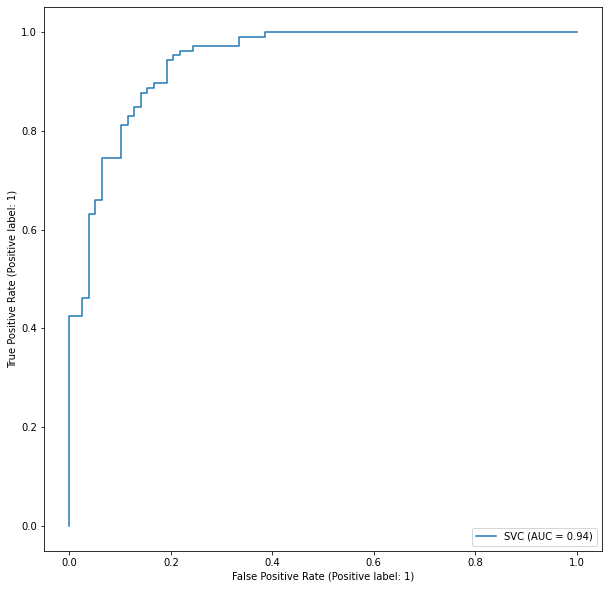

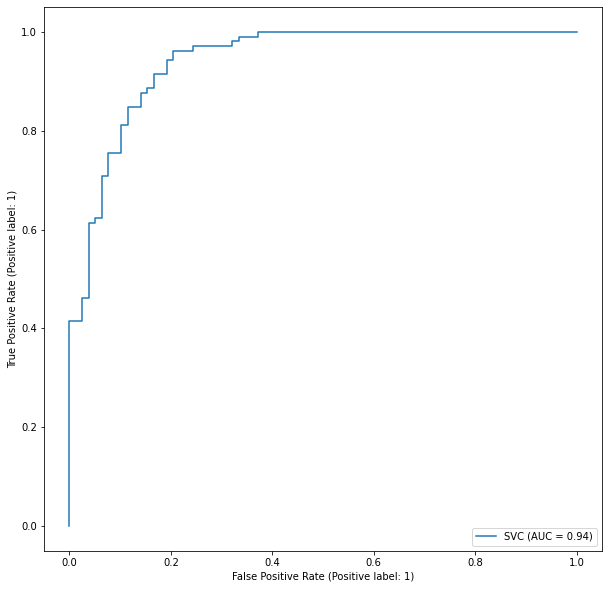

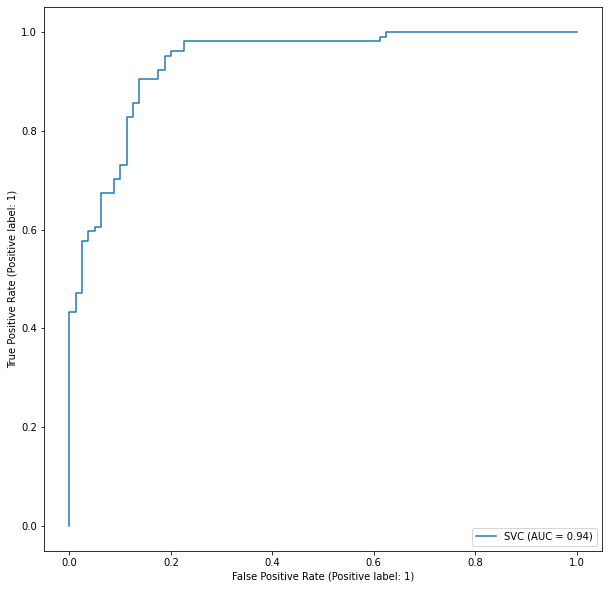

In [61]:
plot_roc_curve(m_svc, x_test, y_test) 
plot_roc_curve(m_svcah, x_test, y_test) 
plot_roc_curve(m_svcahf, X_test, Y_test) 
plt.show()

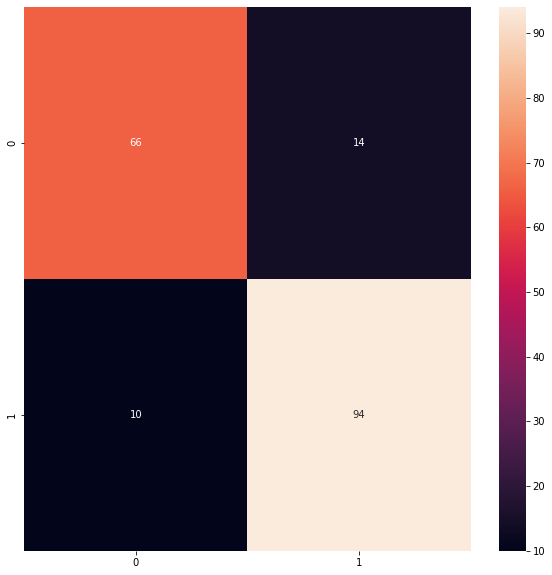

In [62]:
sns.heatmap(cm_svcahf, annot=True)

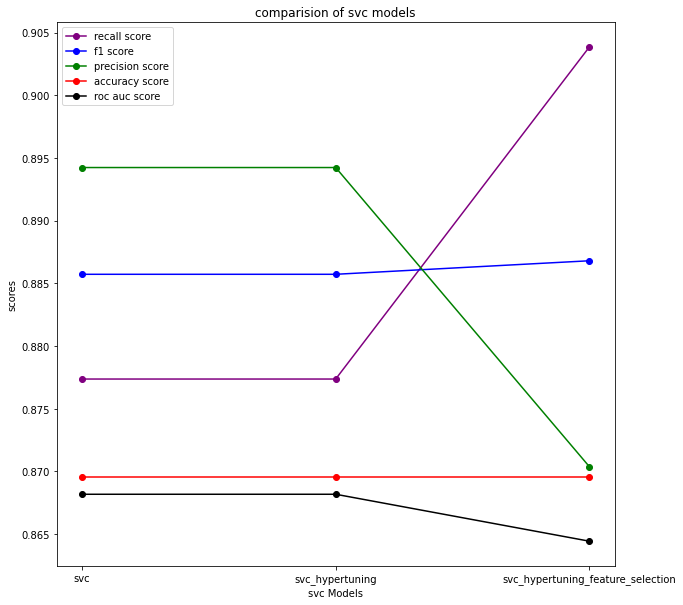

In [63]:
x_svc=['svc','svc_hypertuning','svc_hypertuning_feature_selection']
y_r_svc=[r_svc,r_svcah,r_svcahf]
y_f1_svc=[f1_svc,f1_svcah,f1_svcahf]
y_pc_svc=[pc_svc,pc_svcah,pc_svcahf]
y_ac_svc=[ac_svc,ac_svcah,ac_svcahf]
y_rocauc_svc = [rocauc_svc,rocauc_svcah,rocauc_svcahf]
plt.plot(x_svc, y_r_svc, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x_svc, y_f1_svc, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x_svc, y_pc_svc, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x_svc, y_ac_svc, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x_svc, y_rocauc_svc, color = 'black', marker = 'o', label = 'roc auc score')    
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("svc Models")
plt.ylabel("scores")
plt.title("comparision of svc models")
plt.show()

## Gradient Boosting Classifier

In [64]:
m_gbm=GradientBoostingClassifier()
m_gbm.fit(x_train,y_train)
p_gbm=m_gbm.predict(x_test)

In [65]:
ac_gbm=accuracy_score(y_test,p_gbm)
f1_gbm=	f1_score(y_test,p_gbm)
r_gbm= recall_score(y_test,p_gbm)
pc_gbm=precision_score(y_test,p_gbm)
rocauc_gbm=roc_auc_score(y_test,p_gbm)
cm_gbm=confusion_matrix(y_test,p_gbm)
print('the accuracy is',ac_gbm)
print('the f1_score is',f1_gbm)
print('the recall score is',r_gbm)
print('the precision score is',pc_gbm)
print('the roc auc score is',rocauc_gbm)
print('the confusion matrix is',cm_gbm)
print('the classification report is',classification_report(y_test,p_gbm))

the accuracy is 0.8478260869565217
the f1_score is 0.8640776699029127
the recall score is 0.839622641509434
the precision score is 0.89
the roc auc score is 0.8492985002418965
the confusion matrix is [[67 11]
 [17 89]]
the classification report is               precision    recall  f1-score   support

           0       0.80      0.86      0.83        78
           1       0.89      0.84      0.86       106

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### GridSearchCV

In [66]:
search_gridgbm={'learning_rate':[0.1,1,10],'max_depth':[1,2,4,6],'n_estimators':[100,500,1000]}

In [67]:
searchgbm=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=search_gridgbm,scoring='accuracy',n_jobs=1,cv=5)
searchgbm.fit(x_train,y_train)
searchgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [68]:
m_gbmah=GradientBoostingClassifier(learning_rate=0.1, max_depth=2,n_estimators=100)
m_gbmah.fit(x_train,y_train)
p_gbmah= m_gbmah.predict(x_test)

In [69]:
ac_gbmah=accuracy_score(y_test,p_gbmah)
f1_gbmah=	f1_score(y_test,p_gbmah)
r_gbmah= recall_score(y_test,p_gbmah)
pc_gbmah=precision_score(y_test,p_gbmah)
rocauc_gbmah=roc_auc_score(y_test,p_gbmah)
cm_gbmah=confusion_matrix(y_test,p_gbmah)
print('the accuracy is',ac_gbmah)
print('the f1_score is',f1_gbmah)
print('the recall score is',r_gbmah)
print('the precision score is',pc_gbmah)
print('the roc auc score is',rocauc_gbmah)
print('the confusion matrix is',cm_gbmah)
print('the classification report is',classification_report(y_test,p_gbmah))

the accuracy is 0.8532608695652174
the f1_score is 0.8695652173913043
the recall score is 0.8490566037735849
the precision score is 0.8910891089108911
the roc auc score is 0.854015481373972
the confusion matrix is [[67 11]
 [16 90]]
the classification report is               precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.89      0.85      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



### SFS

In [70]:
m_gbmahf=GradientBoostingClassifier(learning_rate=0.1, max_depth=2,n_estimators=100)
m_gbmahf.fit(X_train,Y_train)
p_gbmahf= m_gbmahf.predict(X_test)

In [71]:
ac_gbmahf=accuracy_score(Y_test,p_gbmahf)
f1_gbmahf=	f1_score(Y_test,p_gbmahf)
r_gbmahf= recall_score(Y_test,p_gbmahf)
pc_gbmahf=precision_score(Y_test,p_gbmahf)
rocauc_gbmahf=roc_auc_score(Y_test,p_gbmahf)
cm_gbmahf=confusion_matrix(Y_test,p_gbmahf)
print('the accuracy is',ac_gbmahf)
print('the f1_score is',f1_gbmahf)
print('the recall score is',r_gbmahf)
print('the precision score is',pc_gbmahf)
print('the roc auc score is',rocauc_gbmahf)
print('the confusion matrix is',cm_gbmahf)
print('the classification report is',classification_report(Y_test,p_gbmahf))

the accuracy is 0.8695652173913043
the f1_score is 0.883495145631068
the recall score is 0.875
the precision score is 0.8921568627450981
the roc auc score is 0.86875
the confusion matrix is [[69 11]
 [13 91]]
the classification report is               precision    recall  f1-score   support

           0       0.84      0.86      0.85        80
           1       0.89      0.88      0.88       104

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### Comparison 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

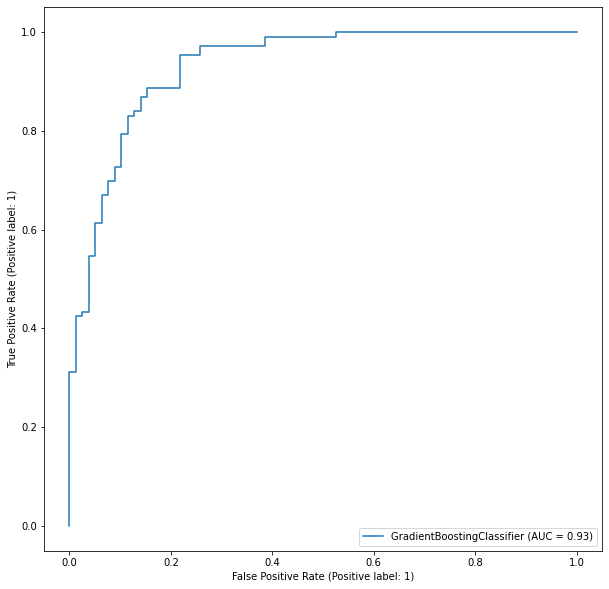

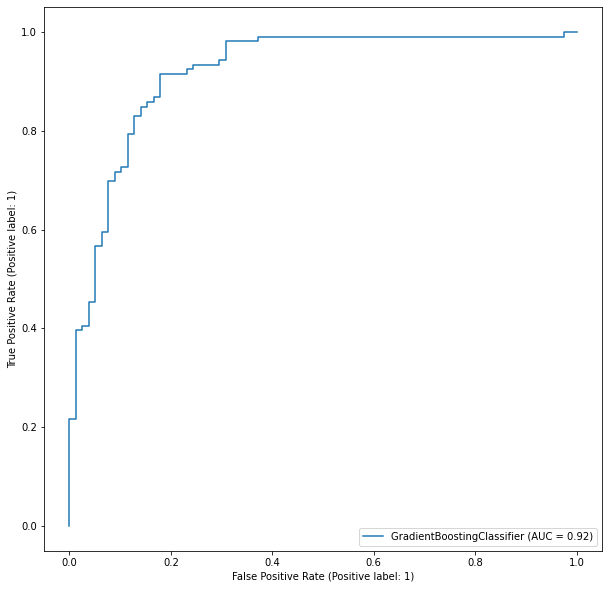

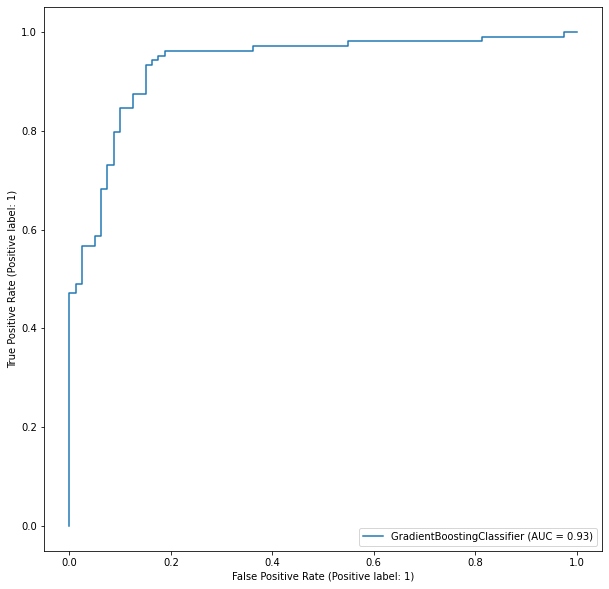

In [72]:
plot_roc_curve(m_gbm, x_test, y_test) 
plot_roc_curve(m_gbmah, x_test, y_test) 
plot_roc_curve(m_gbmahf, X_test, Y_test) 
plt.show()

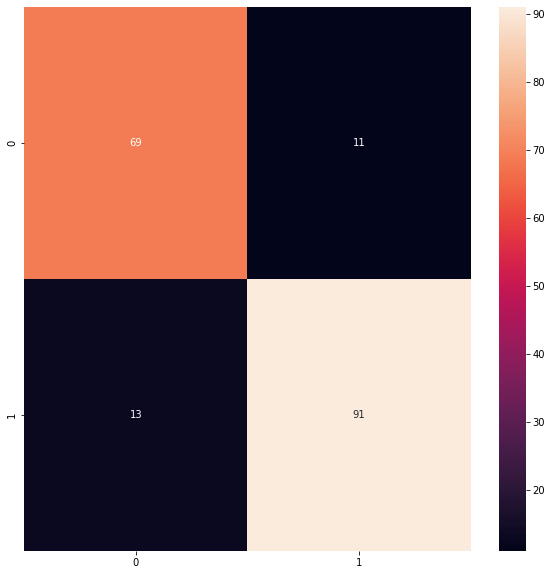

In [73]:
sns.heatmap(cm_gbmahf, annot=True)

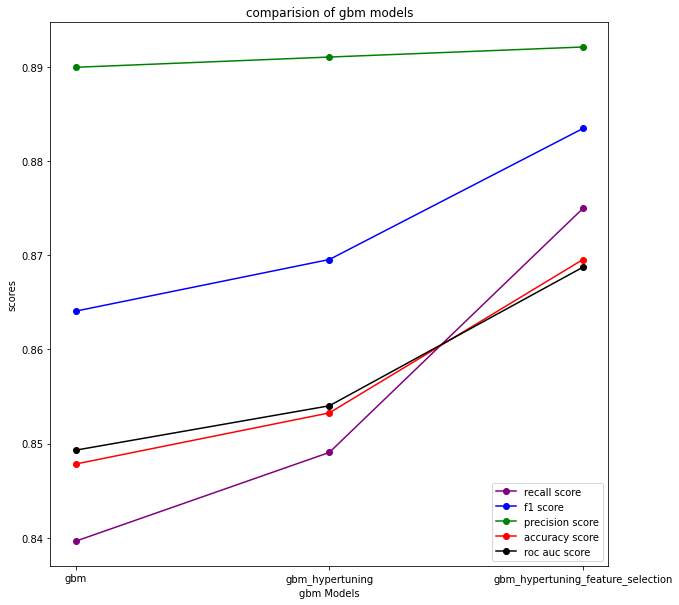

In [74]:
x_gbm=['gbm','gbm_hypertuning','gbm_hypertuning_feature_selection']
y_r_gbm=[r_gbm,r_gbmah,r_gbmahf]
y_f1_gbm=[f1_gbm,f1_gbmah,f1_gbmahf]
y_pc_gbm=[pc_gbm,pc_gbmah,pc_gbmahf]
y_ac_gbm=[ac_gbm,ac_gbmah,ac_gbmahf]
y_rocauc_gbm = [rocauc_gbm,rocauc_gbmah,rocauc_gbmahf]
plt.plot(x_gbm, y_r_gbm, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x_gbm, y_f1_gbm, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x_gbm, y_pc_gbm, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x_gbm, y_ac_gbm, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x_gbm, y_rocauc_gbm, color = 'black', marker = 'o', label = 'roc auc score')    
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("gbm Models")
plt.ylabel("scores")
plt.title("comparision of gbm models")
plt.show()

## Random Forest Classifier

In [75]:
m_rf=RandomForestClassifier()
m_rf.fit(x_train,y_train)
p_rf=m_rf.predict(x_test)

In [76]:
ac_rf=accuracy_score(y_test,p_rf)
f1_rf=	f1_score(y_test,p_rf)
r_rf= recall_score(y_test,p_rf)
pc_rf=precision_score(y_test,p_rf)
rocauc_rf=roc_auc_score(y_test,p_rf)
cm_rf=confusion_matrix(y_test,p_rf)
print('the accuracy is',ac_rf)
print('the f1_score is',f1_rf)
print('the recall score is',r_rf)
print('the precision score is',pc_rf)
print('the roc auc score is',rocauc_rf)
print('the confusion matrix is',cm_rf)
print('the classification report is',classification_report(y_test,p_rf))

the accuracy is 0.8641304347826086
the f1_score is 0.8803827751196173
the recall score is 0.8679245283018868
the precision score is 0.8932038834951457
the roc auc score is 0.8634494436381229
the confusion matrix is [[67 11]
 [14 92]]
the classification report is               precision    recall  f1-score   support

           0       0.83      0.86      0.84        78
           1       0.89      0.87      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### GridSearchCV

In [77]:
param_gridrf = {'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5],  'n_estimators': [100, 200, 300, 1000]}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_gridrf, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


RandomForestClassifier(max_depth=110, min_samples_leaf=5)

In [78]:
m_rfah=RandomForestClassifier(max_depth=110, min_samples_leaf=4,n_estimators=100)
m_rfah.fit(x_train,y_train)
p_rfah=m_rfah.predict(x_test)

In [79]:
ac_rfah=accuracy_score(y_test,p_rfah)
f1_rfah=	f1_score(y_test,p_rfah)
r_rfah= recall_score(y_test,p_rfah)
pc_rfah=precision_score(y_test,p_rfah)
rocauc_rfah=roc_auc_score(y_test,p_rfah)
cm_rfah=confusion_matrix(y_test,p_rfah)
print('the accuracy is',ac_rfah)
print('the f1_score is',f1_rfah)
print('the recall score is',r_rfah)
print('the precision score is',pc_rfah)
print('the roc auc score is',rocauc_rfah)
print('the confusion matrix is',cm_rfah)
print('the classification report is',classification_report(y_test,p_rfah))

the accuracy is 0.875
the f1_score is 0.8899521531100479
the recall score is 0.8773584905660378
the precision score is 0.9029126213592233
the roc auc score is 0.8745766811804547
the confusion matrix is [[68 10]
 [13 93]]
the classification report is               precision    recall  f1-score   support

           0       0.84      0.87      0.86        78
           1       0.90      0.88      0.89       106

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



### SFS

In [80]:
m_rfahf=RandomForestClassifier(max_depth=110, min_samples_leaf=4,n_estimators=100)
m_rfahf.fit(X_train,Y_train)
p_rfahf= m_rfahf.predict(X_test)

In [81]:
ac_rfahf=accuracy_score(Y_test,p_rfahf)
f1_rfahf=	f1_score(Y_test,p_rfahf)
r_rfahf= recall_score(Y_test,p_rfahf)
pc_rfahf=precision_score(Y_test,p_rfahf)
rocauc_rfahf=roc_auc_score(Y_test,p_rfahf)
cm_rfahf=confusion_matrix(Y_test,p_rfahf)
print('the accuracy is',ac_rfahf)
print('the f1_score is',f1_rfahf)
print('the recall score is',r_rfahf)
print('the precision score is',pc_rfahf)
print('the roc auc score is',rocauc_rfahf)
print('the confusion matrix is',cm_rfahf)
print('the classification report is',classification_report(Y_test,p_rfahf))

the accuracy is 0.8913043478260869
the f1_score is 0.9047619047619048
the recall score is 0.9134615384615384
the precision score is 0.8962264150943396
the roc auc score is 0.8879807692307692
the confusion matrix is [[69 11]
 [ 9 95]]
the classification report is               precision    recall  f1-score   support

           0       0.88      0.86      0.87        80
           1       0.90      0.91      0.90       104

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### Comparison 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

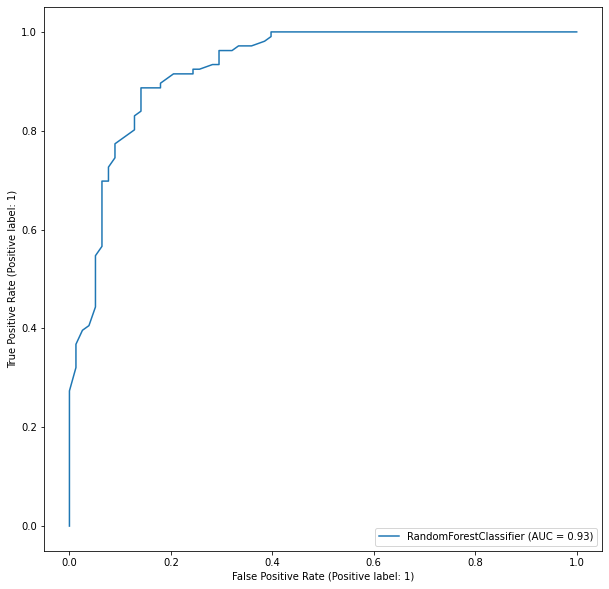

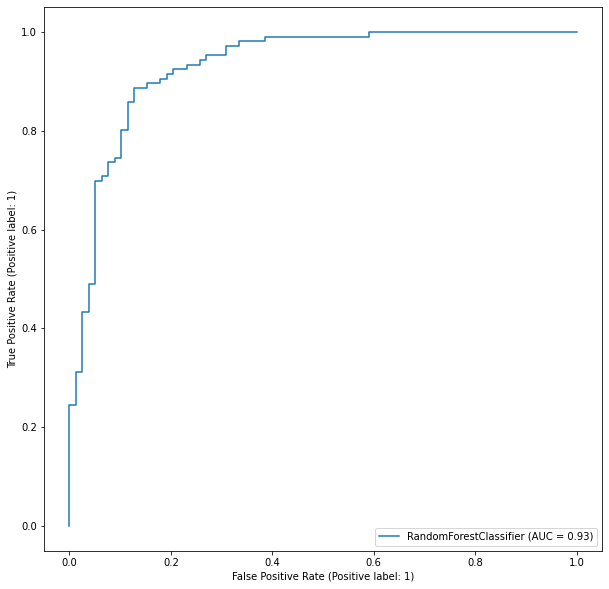

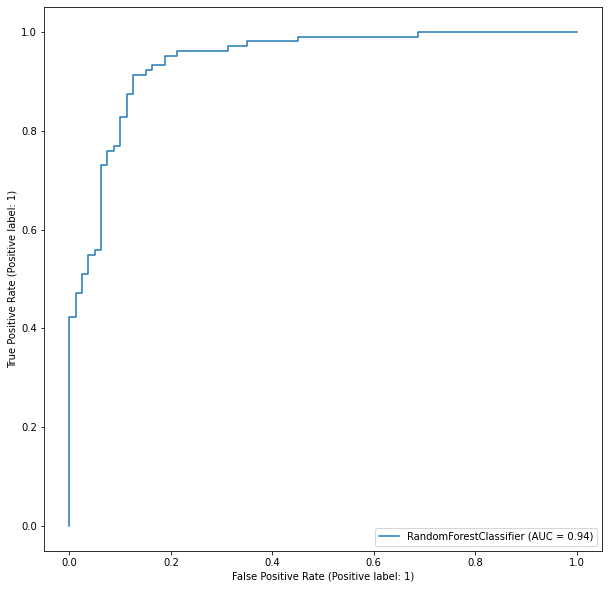

In [82]:
plot_roc_curve(m_rf, x_test, y_test) 
plot_roc_curve(m_rfah, x_test, y_test) 
plot_roc_curve(m_rfahf, X_test, Y_test) 
plt.show()

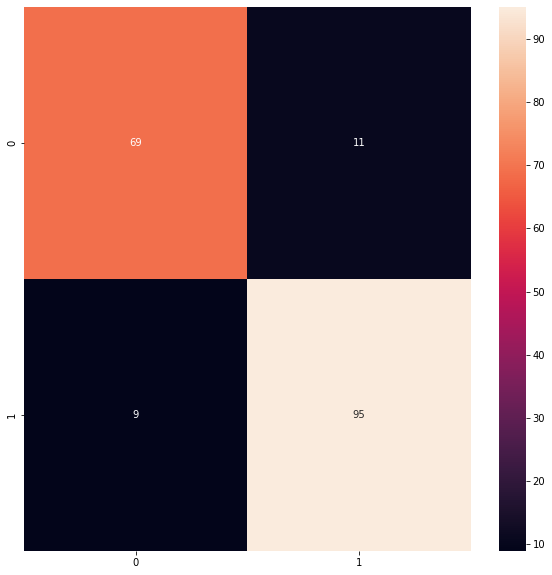

In [83]:
sns.heatmap(cm_rfahf, annot=True)

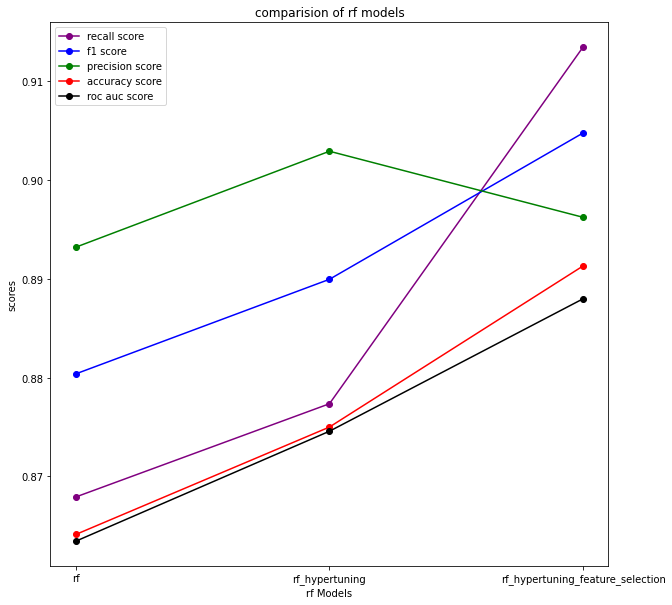

In [84]:
x_rf=['rf','rf_hypertuning','rf_hypertuning_feature_selection']
y_r_rf=[r_rf,r_rfah,r_rfahf]
y_f1_rf=[f1_rf,f1_rfah,f1_rfahf]
y_pc_rf=[pc_rf,pc_rfah,pc_rfahf]
y_ac_rf=[ac_rf,ac_rfah,ac_rfahf]
y_rocauc_rf = [rocauc_rf,rocauc_rfah,rocauc_rfahf]
plt.plot(x_rf, y_r_rf, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x_rf, y_f1_rf, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x_rf, y_pc_rf, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x_rf, y_ac_rf, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x_rf, y_rocauc_rf, color = 'black', marker = 'o', label = 'roc auc score')    
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("rf Models")
plt.ylabel("scores")
plt.title("comparision of rf models")
plt.show()

## Logistic Regression

In [85]:
m_lr=LogisticRegression()
m_lr.fit(x_train,y_train)
p_lr=m_lr.predict(x_test)

In [86]:
ac_lr=accuracy_score(y_test,p_lr)
f1_lr=	f1_score(y_test,p_lr)
r_lr= recall_score(y_test,p_lr)
pc_lr=precision_score(y_test,p_lr)
rocauc_lr=roc_auc_score(y_test,p_lr)
cm_lr=confusion_matrix(y_test,p_lr)
print('the accuracy is',ac_lr)
print('the f1_score is',f1_lr)
print('the recall score is',r_lr)
print('the precision score is',pc_lr)
print('the roc auc score is',rocauc_lr)
print('the confusion matrix is',cm_lr)
print('the classification report is',classification_report(y_test,p_lr))

the accuracy is 0.8532608695652174
the f1_score is 0.8695652173913043
the recall score is 0.8490566037735849
the precision score is 0.8910891089108911
the roc auc score is 0.854015481373972
the confusion matrix is [[67 11]
 [16 90]]
the classification report is               precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.89      0.85      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



### GridSearchCV

In [87]:
param_gridlr={'C':[100, 10, 1.0, 0.1, 0.01],'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid_searchlr = GridSearchCV(estimator = LogisticRegression(), param_grid = param_gridlr, cv = 5, n_jobs = -1, verbose = 2)
grid_searchlr.fit(x_train,y_train)
grid_searchlr.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


LogisticRegression(C=100, solver='newton-cg')

In [88]:
m_lrah=LogisticRegression(C=100, solver='newton-cg')
m_lrah.fit(x_train,y_train)
p_lrah=m_lrah.predict(x_test)

In [89]:
ac_lrah=accuracy_score(y_test,p_lrah)
f1_lrah=	f1_score(y_test,p_lrah)
r_lrah= recall_score(y_test,p_lrah)
pc_lrah=precision_score(y_test,p_lrah)
rocauc_lrah=roc_auc_score(y_test,p_lrah)
cm_lrah=confusion_matrix(y_test,p_lrah)
print('the accuracy is',ac_lrah)
print('the f1_score is',f1_lrah)
print('the recall score is',r_lrah)
print('the precision score is',pc_lrah)
print('the roc auc score is',rocauc_lrah)
print('the confusion matrix is',cm_lrah)
print('the classification report is',classification_report(y_test,p_lrah))

the accuracy is 0.8532608695652174
the f1_score is 0.8695652173913043
the recall score is 0.8490566037735849
the precision score is 0.8910891089108911
the roc auc score is 0.854015481373972
the confusion matrix is [[67 11]
 [16 90]]
the classification report is               precision    recall  f1-score   support

           0       0.81      0.86      0.83        78
           1       0.89      0.85      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



### SFS

In [90]:
m_lrahf=LogisticRegression(C=100, solver='newton-cg')
m_lrahf.fit(X_train,Y_train)
p_lrahf= m_lrahf.predict(X_test)

In [91]:
ac_lrahf=accuracy_score(Y_test,p_lrahf)
f1_lrahf=	f1_score(Y_test,p_lrahf)
r_lrahf= recall_score(Y_test,p_lrahf)
pc_lrahf=precision_score(Y_test,p_lrahf)
rocauc_lrahf=roc_auc_score(Y_test,p_lrahf)
cm_lrahf=confusion_matrix(Y_test,p_lrahf)
print('the accuracy is',ac_lrahf)
print('the f1_score is',f1_lrahf)
print('the recall score is',r_lrahf)
print('the precision score is',pc_lrahf)
print('the roc auc score is',rocauc_lrahf)
print('the confusion matrix is',cm_lrahf)
print('the classification report is',classification_report(Y_test,p_lrahf))

the accuracy is 0.842391304347826
the f1_score is 0.8599033816425121
the recall score is 0.8557692307692307
the precision score is 0.8640776699029126
the roc auc score is 0.8403846153846154
the confusion matrix is [[66 14]
 [15 89]]
the classification report is               precision    recall  f1-score   support

           0       0.81      0.82      0.82        80
           1       0.86      0.86      0.86       104

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### Comparison 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

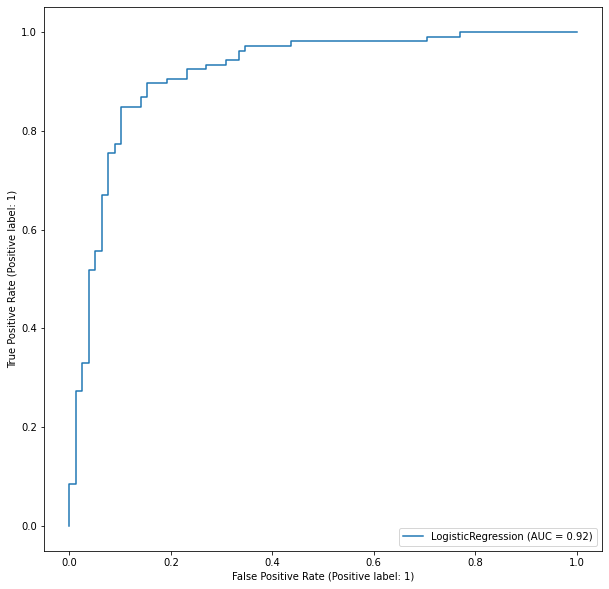

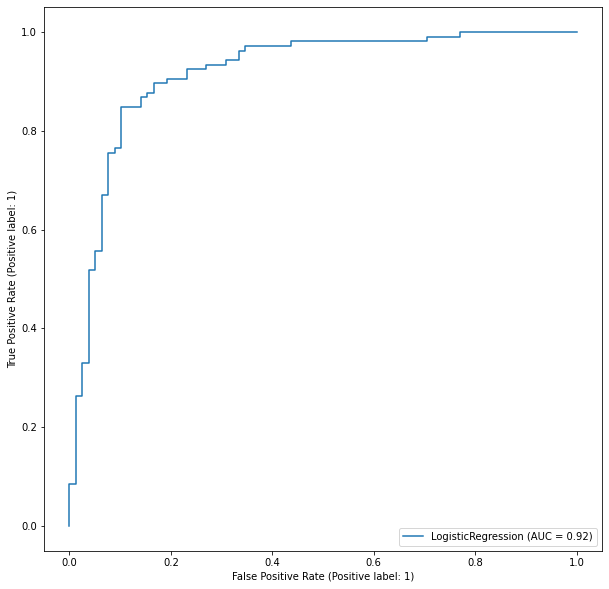

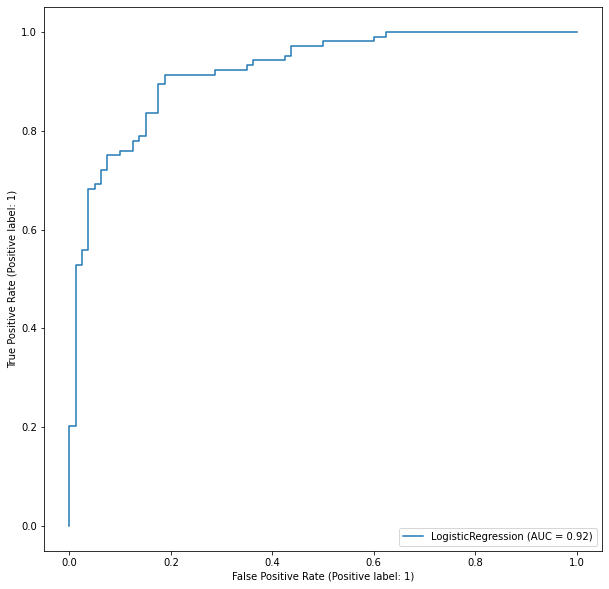

In [92]:
plot_roc_curve(m_lr, x_test, y_test) 
plot_roc_curve(m_lrah, x_test, y_test) 
plot_roc_curve(m_lrahf, X_test, Y_test) 
plt.show()

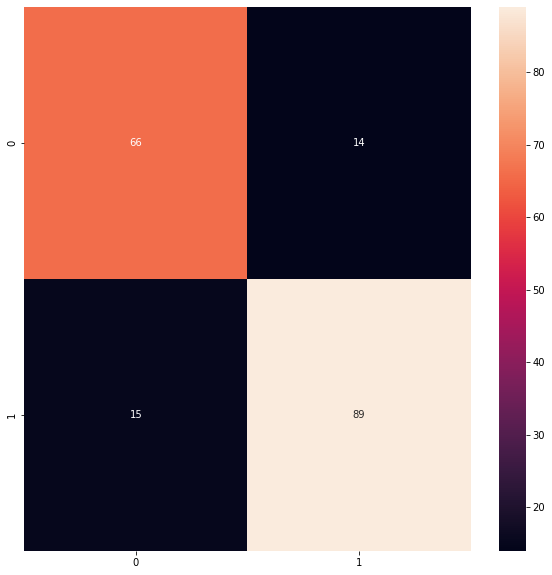

In [93]:
sns.heatmap(cm_lrahf, annot=True)

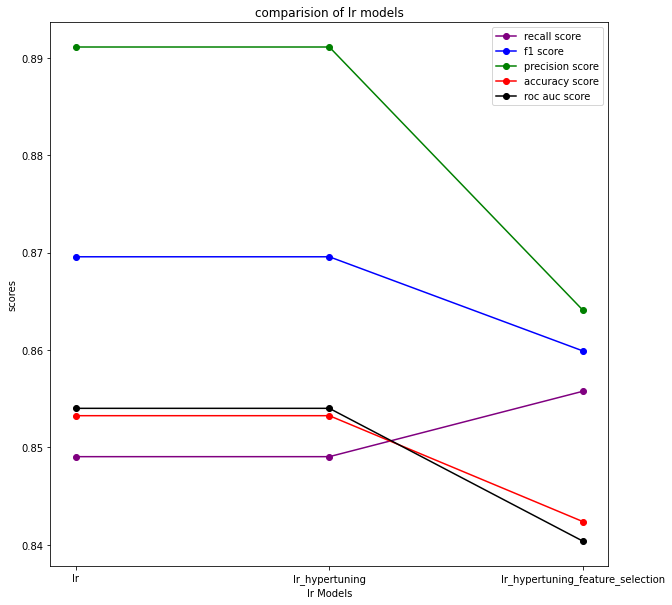

In [94]:
x_lr=['lr','lr_hypertuning','lr_hypertuning_feature_selection']
y_r_lr=[r_lr,r_lrah,r_lrahf]
y_f1_lr=[f1_lr,f1_lrah,f1_lrahf]
y_pc_lr=[pc_lr,pc_lrah,pc_lrahf]
y_ac_lr=[ac_lr,ac_lrah,ac_lrahf]
y_rocauc_lr = [rocauc_lr,rocauc_lrah,rocauc_lrahf]
plt.plot(x_lr, y_r_lr, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x_lr, y_f1_lr, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x_lr, y_pc_lr, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x_lr, y_ac_lr, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x_lr, y_rocauc_lr, color = 'black', marker = 'o', label = 'roc auc score')    
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("lr Models")
plt.ylabel("scores")
plt.title("comparision of lr models")
plt.show()

# Comparison of Models

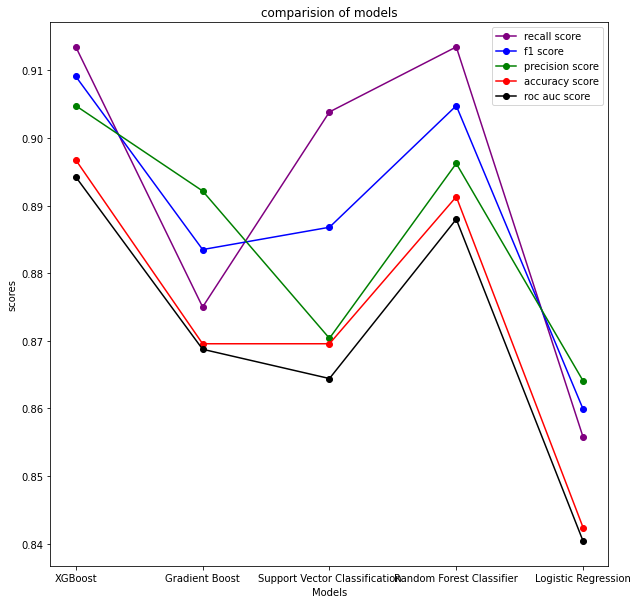

In [95]:
x = ['XGBoost', 'Gradient Boost', 'Support Vector Classification', 'Random Forest Classifier', 'Logistic Regression']
y_r = [r_xgcahf, r_gbmahf, r_svcahf, r_rfahf, r_lrahf]
y_f1 = [f1_xgcahf, f1_gbmahf, f1_svcahf, f1_rfahf, f1_lrahf]
y_pc = [pc_xgcahf, pc_gbmahf, pc_svcahf, pc_rfahf, pc_lrahf]
y_ac = [ac_xgcahf, ac_gbmahf, ac_svcahf, ac_rfahf, ac_lrahf]
y_rocauc = [rocauc_xgcahf, rocauc_gbmahf, rocauc_svcahf, rocauc_rfahf, rocauc_lrahf]
plt.plot(x, y_r, color = 'purple', marker = 'o', label = 'recall score')
plt.plot(x, y_f1, color = 'blue', marker = 'o', label = 'f1 score')
plt.plot(x, y_pc, color = 'green', marker = 'o', label = 'precision score')
plt.plot(x, y_ac, color = 'red', marker = 'o', label = 'accuracy score')
plt.plot(x, y_rocauc, color = 'black', marker = 'o', label = 'roc auc score')
plt.legend(loc = "best")
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]
plt.xlabel("Models")
plt.ylabel("scores")
plt.title("comparision of models")
plt.show()